In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/HP/OneDrive/Desktop/posts/Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
#To determine the top 3 most common cuisines in the Dataset
common_cuisines = df['Cuisines'].value_counts()
common_cuisines.head(3)

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64

In [4]:
#total restaurants
total_restro = len(df)
total_restro

9551

In [5]:
# to Calculate the percentage of restaurants that serve each of the top cuisines
percentage = (common_cuisines/total_restro)*100
percentage.head(3)

Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64

In [6]:
#level 1 - task 2 := to identify the city with the highest number of restaurants
city_high_restro = df['City'].value_counts()
city_high_restro.head(1)

City
New Delhi    5473
Name: count, dtype: int64

In [7]:
#To find the average rating for restaurants in each city
avg_ratings = df.groupby('City')['Aggregate rating'].mean()
avg_ratings

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

In [8]:
high_rating_city = avg_ratings.idxmax()
high_rating_city

'Inner City'

In [9]:
#Task: Price Range Distribution
#Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants
price_range = df['Price range'].value_counts()
price_range

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [10]:
total_restro = len(df)
total_restro

9551

In [11]:
#To find the percentage of restaurants in each price range
restro_percent = (price_range/total_restro)*100
restro_percent

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64

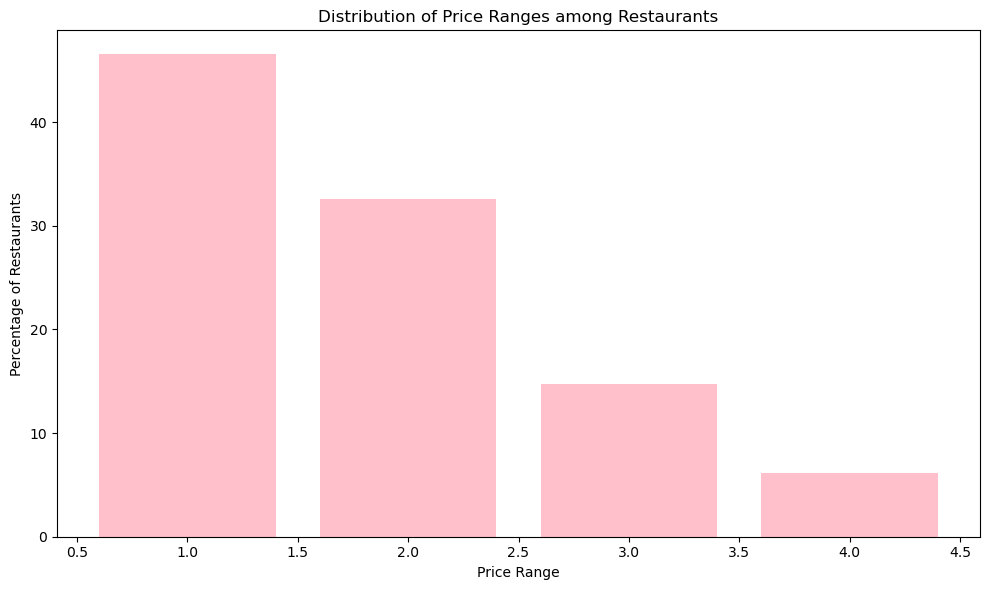

In [12]:
#histogram to visualize distribution of price ranges
plt.figure(figsize = (10,6))
plt.bar(restro_percent.index , restro_percent.values , color = 'pink')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants')
plt.title('Distribution of Price Ranges among Restaurants')
plt.tight_layout()
plt.show()

In [14]:
#level1(task 4) to determine the percentage of restaurants that offer Online Delivery
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': True, 'No': False})
online_delivery_percentage = df['Has Online delivery'].mean() * 100
print(f"Percentage of restaurants that offer online delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants that offer online delivery: 25.66%


In [16]:
df = pd.read_csv("C:/Users/HP/OneDrive/Desktop/posts/Dataset .csv")
restro_wit_online_delivery = df['Has Online delivery'].value_counts().get('Yes', 0)
percent_wit_online_delivery = (restro_wit_online_delivery / total_restro) * 100
print("percentage with online delivery",percent_wit_online_delivery)

percentage with online delivery 25.662234321013504


In [17]:
average_rating_with_online_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
print("average rating with online delivery",average_rating_with_online_delivery)

average rating with online delivery 3.2488372093023257


In [18]:
average_rating_without_online_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()
print("average rating without online delivery",average_rating_without_online_delivery)

average rating without online delivery 2.465295774647887
